Grading policies for hw2:

1pt: load weather data and automatically parse dates, set the index to the date, plot temperature and precipitation using plot()

1pt: load bicycle data and resample it in a daily sum, plot total daily ride count using plot()

1pt: join bicycle count data and weather data using join(), create scatter plots of bicycle counts versus weather data

1pt: observation on correlation between weather and bike count

1pt: discussion on other factors

Comments: 
a) Two different datasets are used 
1. 4xy5-26gy.csv
In this dataset, the bicycle count data are mostly concentrated in 2012 and 2015, and various number of counts are recorded for each day. So resampling by sum in a daily base is affected by the number of records per day (resampling by mean means more sense). It also seems a good idea to separate the data into 2012 and 2015 parts.
2. Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv

b) The temperature in the weather data are in tenths of degrees Celsius, 9999 means missing data, precipitation is in tenths of mm.

In [1]:
%matplotlib inline 
# set this magic above importing pyplot, otherwise pandas 
# plotting with dataframe with a date index gives an error

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_weather = pd.read_csv('../data/weather_data.csv', parse_dates=[2]) # parse dates
data_weather = data_weather.set_index(['DATE']) # set the index to the date

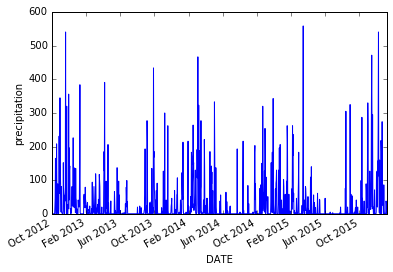

In [10]:
plt.figure()
data_weather['PRCP'].plot()
plt.ylabel('precipitation')

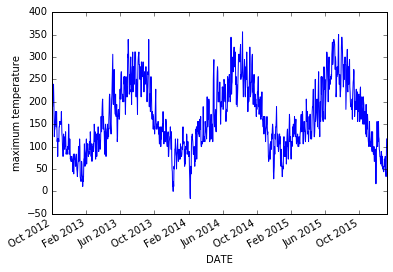

In [11]:
plt.figure()
data_weather['TMAX'].plot()
plt.ylabel('maximum temperature')

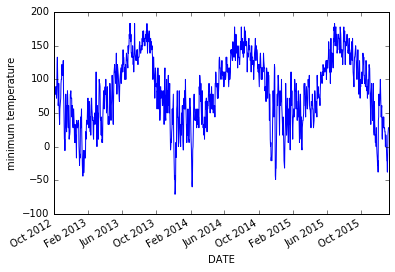

In [12]:
plt.figure()
data_weather['TMIN'].plot()
plt.ylabel('minimum temperature')

In [4]:
data_bike = pd.read_csv('../data/4xy5-26gy.csv', parse_dates=[0])
data_bike = data_bike.set_index(['date'])

In [14]:
# resample by mean seems more reasonable 
# though homework asks to resample by sum
data_bike_resamp = data_bike.resample(rule='1D', how='mean')
data_bike_resamp['total'] = data_bike_resamp['fremont_bridge_nb'] + data_bike_resamp['fremont_bridge_sb']

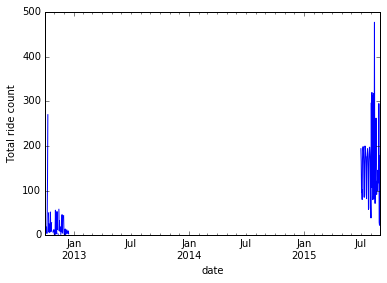

In [16]:
plt.figure()
data_bike_resamp['total'].plot()
plt.ylabel('Total ride count')

In [7]:
data_all = data_weather.join(data_bike_resamp)

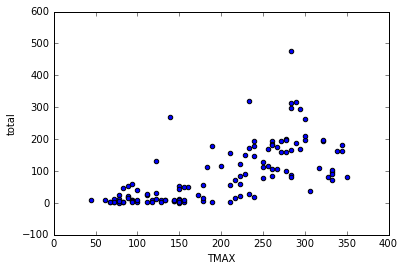

In [20]:
plt.figure()
data_all.plot(kind='scatter', x='TMAX', y='total')
plt.show()

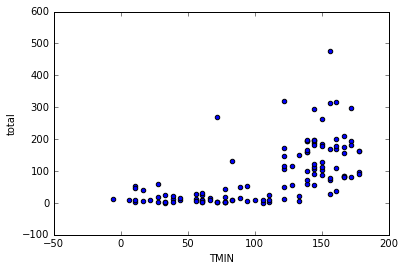

In [21]:
plt.figure()
data_all.plot(kind='scatter', x='TMIN', y='total')
plt.show()

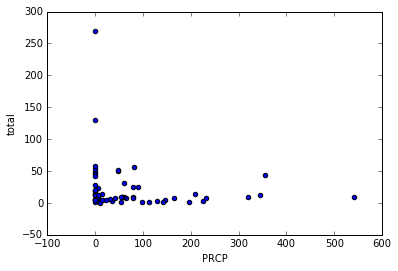

In [17]:
data2012 = data_all[data_all.index.year == 2012]
plt.figure()
data2012.plot(kind='scatter', x='PRCP', y='total')
plt.show()

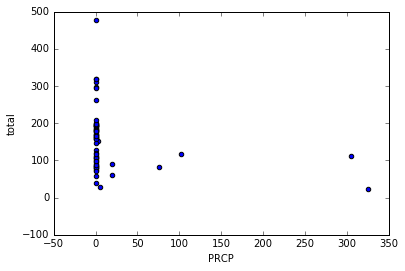

In [18]:
data2015 = data_all[data_all.index.year == 2015]
plt.figure()
data2015.plot(kind='scatter', x='PRCP', y='total')
plt.show()

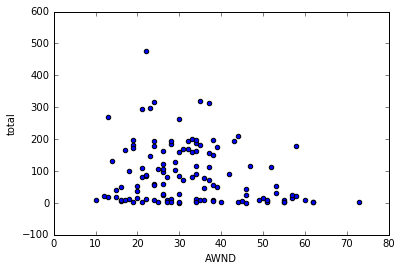

In [22]:
plt.figure()
data_all.plot(kind='scatter', x='AWND', y='total')
plt.show()